<a href="https://colab.research.google.com/github/advaitha/D2AI/blob/main/Linear_regression_implementation_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [4]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X,w) + b
  y += torch.normal(0,0.01,y.shape)
  return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:',features[0], '\nlabel:',labels[0])

features: tensor([ 0.3866, -0.5268]) 
label: tensor([6.7626])


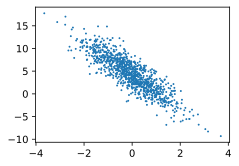

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1);

In [7]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break


tensor([[-0.5608,  1.6270],
        [-0.4365,  0.0739],
        [ 0.0788, -1.0198],
        [ 0.3400, -0.0053],
        [-0.5951, -0.1105],
        [-0.2030, -0.1449],
        [-0.4135, -0.9251],
        [-0.1186, -1.1496],
        [-0.1685,  2.5467],
        [-0.6095,  0.1475]]) 
 tensor([[-2.4462],
        [ 3.0786],
        [ 7.8287],
        [ 4.8990],
        [ 3.3952],
        [ 4.2986],
        [ 6.5152],
        [ 7.8664],
        [-4.8007],
        [ 2.4773]])


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X,w,b):
  return torch.matmul(X,w) + b

In [11]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [12]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X,w,b),y)
    l.sum().backward()
    sgd([w,b],lr,batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b),labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.026685
epoch 2, loss 0.000089
epoch 3, loss 0.000052


In [14]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0004, 0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)
